#Import Liabraries

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




#Read Data

In [155]:
df  = pd.read_csv(r"magic04.csv")
cols = df.columns

In [156]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [159]:
df["class"] = df["class"].map({'g':0, 'h':1})

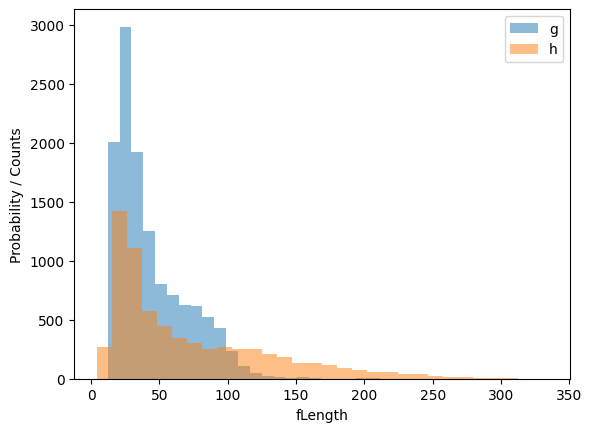

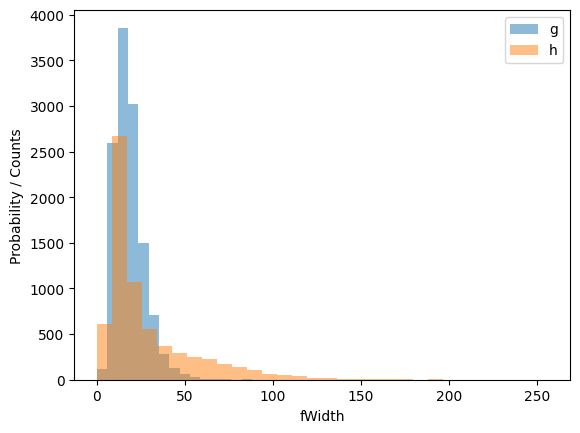

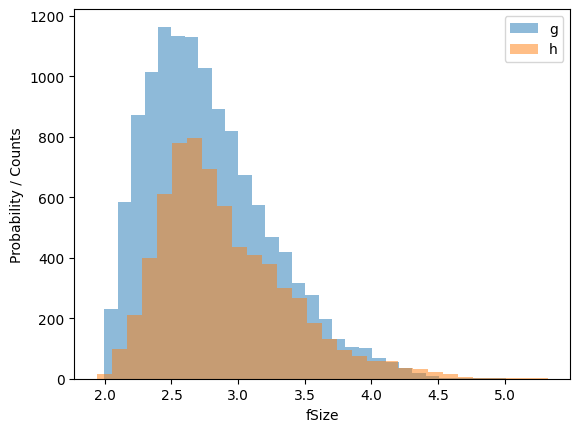

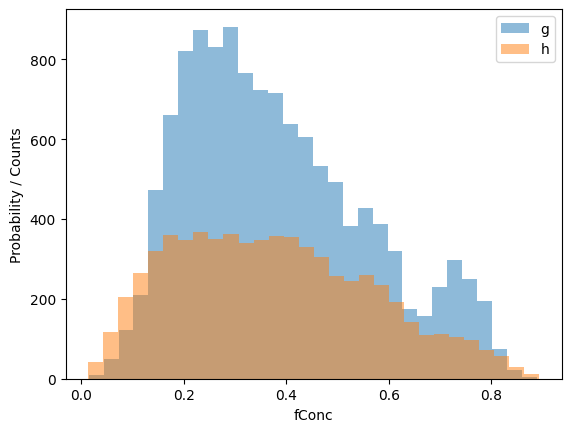

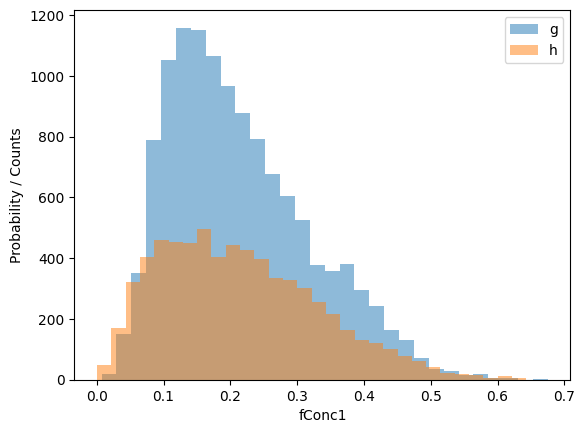

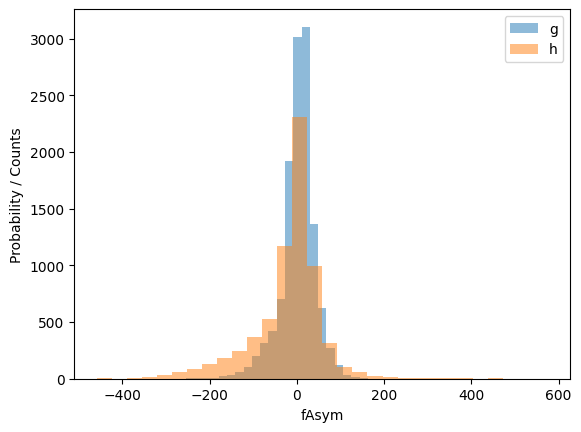

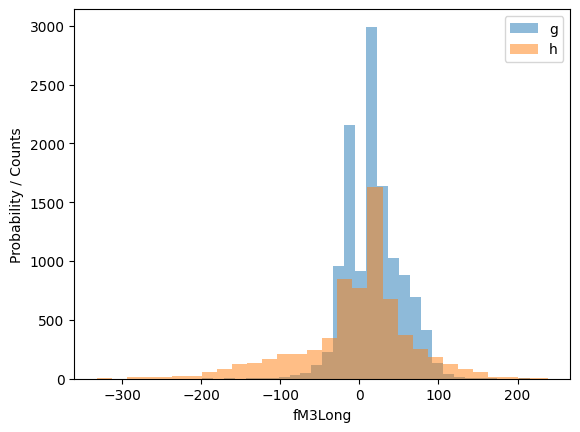

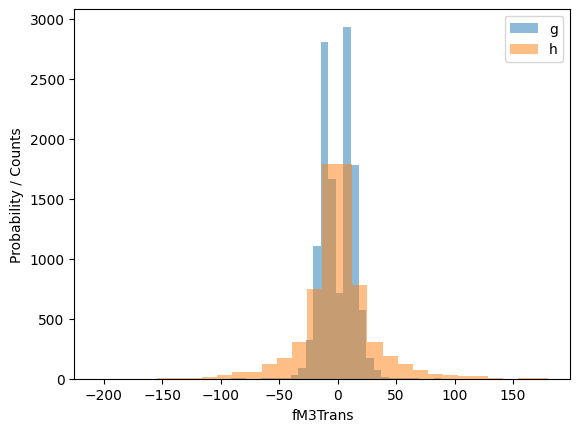

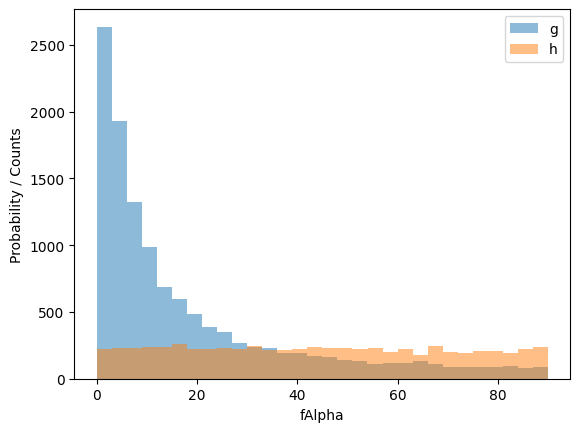

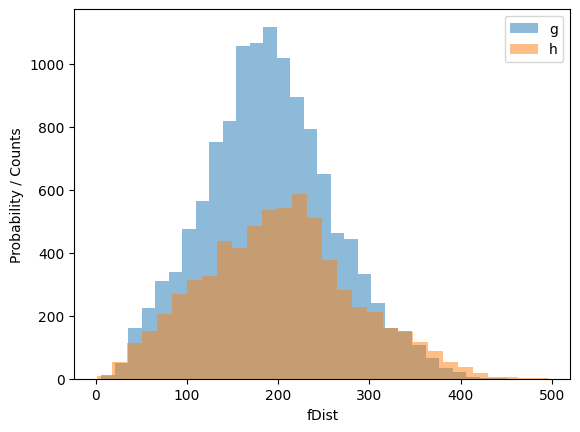

In [158]:
for label in cols[:-1]:
    plt.hist(df[label][df["class"]==0], bins=30, alpha=0.5, label='g')
    plt.hist(df[label][df["class"]==1], bins=30, alpha=0.5, label='h')
    plt.xlabel(label)
    plt.ylabel("Probability / Counts")
    plt.legend()
    plt.show()

In [160]:
def scale(df, oversample=False):
    scaler = StandardScaler()
    X = df[df.columns[:-1]].values  # Convert to numpy array
    y = df[df.columns[-1]].values  # Convert to numpy array
    X = scaler.fit_transform(X)
    
    
    if oversample:
        ros = RandomOverSampler(random_state=42)
        X, y = ros.fit_resample(X, y)
    
    # Stack X and y horizontally
    data = np.hstack((X, y.reshape(-1, 1)))
    return data, X, y

In [161]:
train,valid,test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

In [162]:
# Scale and prepare all datasets
train_scaled, X_train, y_train = scale(train, oversample=True)
valid_scaled, X_valid, y_valid = scale(valid, oversample=False)
test_scaled, X_test, y_test = scale(test, oversample=False)

# Verify shapes
print("Training shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_valid.shape, y_valid.shape)
print("Test shapes:", X_test.shape, y_test.shape)

c:\Users\anubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\externals\array_api_compat\numpy\_aliases.py:125: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype=dtype, copy=copy)


ValueError: Input y contains NaN.

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[0 1 1 ... 0 0 1]
[[2086  387]
 [ 359  972]]
0.8038906414300736


In [164]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[0 0 0 ... 0 0 0]
[[2205  268]
 [ 814  517]]
0.7155625657202944


In [165]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))   


[0 1 1 ... 0 1 1]
[[2004  469]
 [ 387  944]]
0.7749737118822292


In [166]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))



[0 1 1 ... 0 0 1]
[[2214  259]
 [ 285 1046]]
0.8569926393270242


In [185]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()


  

In [180]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    verbose=1
)
    return model,history

# Ensure data is numpy arrays
# X_train = np.array(X_train)
# y_train = np.array(y_train).ravel()   # flatten y to (n_samples,)

# # Build model
# nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])




In [181]:
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("Unique labels in y_train:", np.unique(y_train))


In [182]:
# # from sklearn.preprocessing import LabelEncoder
# # import numpy as np

# # # Ensure numpy array
# # y_train = np.array(y_train)

# # # Encode string labels to integers
# # le = LabelEncoder()
# # y_train = le.fit_transform(y_train)

# # print("Encoded labels:", np.unique(y_train))  # should be [0 1]
# # y_valid = le.transform(y_valid)
# # y_test = le.transform(y_test)

# model, history = train_model(X_train, y_train, dropout_prob=0.2, lr=0.001)


In [188]:

import matplotlib.pyplot as plt

def train_and_evaluate(X_train, y_train, X_valid, y_valid):
    least_val_loss = float('inf')
    least_loss_model = None
    epochs = 100

    for num_nodes in [16, 32, 64]:
        for dropout_prob in [0, 0.2]:
            for lr in [0.01, 0.005, 0.001]:
                for batch_size in [32, 64, 128]:
                    print(f"num_nodes: {num_nodes}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
                    model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                    plot_history(history)
                    val_loss = model.evaluate(X_valid, y_valid)[0]
                    if val_loss < least_val_loss:
                        least_val_loss = val_loss
                        least_loss_model = model
                        print

    # return least_loss_model

# Note: The `train_model` function is assumed to be defined elsewhere

num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 32
Epoch 1/100


c:\Users\anubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.3969 - val_accuracy: 0.7024 - val_loss: 0.5119
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.3969 - val_accuracy: 0.7024 - val_loss: 0.5119
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3464 - val_accuracy: 0.7399 - val_loss: 0.4743
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3464 - val_accuracy: 0.7399 - val_loss: 0.4743
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3316 - val_accuracy: 0.7571 - val_loss: 0.4352
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3316 - val_accuracy: 0.7571 - val_loss: 0.4352
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8590 - loss: 0.3249 - val_accuracy: 0.7591 - val_loss: 0.4567
Epoch 5/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8590 - loss: 0.3249 - val_accuracy: 0.7591

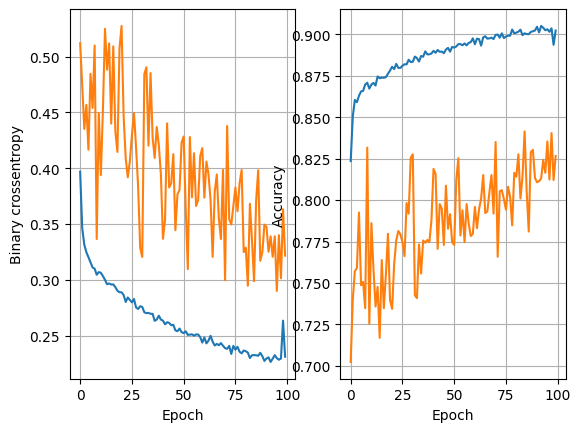

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.3860  
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.3860  
num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 64
Epoch 1/100
num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 64
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.3941 - val_accuracy: 0.7453 - val_loss: 0.4799
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.3941 - val_accuracy: 0.7453 - val_loss: 0.4799
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3458 - val_accuracy: 0.7783 - val_loss: 0.4447
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3458 - val_accuracy: 0.7783 - val_loss: 0.4447
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.3338 - val_accuracy: 0.7176 - val_loss: 0.5757
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - l

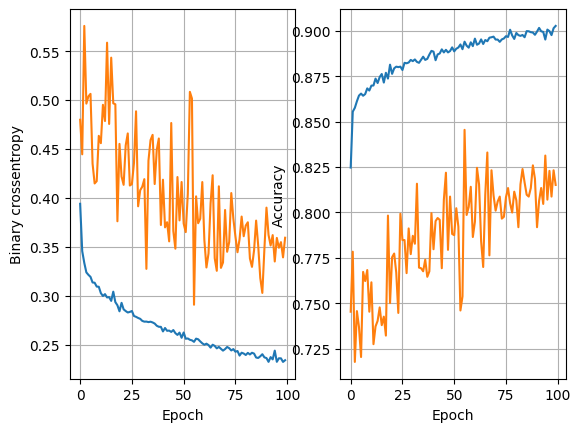

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3743
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3743
num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 128
num_nodes: 16, dropout_prob: 0, lr: 0.01, batch_size: 128
Epoch 1/100
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8279 - loss: 0.3904 - val_accuracy: 0.7051 - val_loss: 0.6025
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8279 - loss: 0.3904 - val_accuracy: 0.7051 - val_loss: 0.6025
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3435 - val_accuracy: 0.6886 - val_loss: 0.5850
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3435 - val_accuracy: 0.6886 - val_loss: 0.5850
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3346 - val_accuracy: 0.7979 - val_loss: 0.3481
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - los

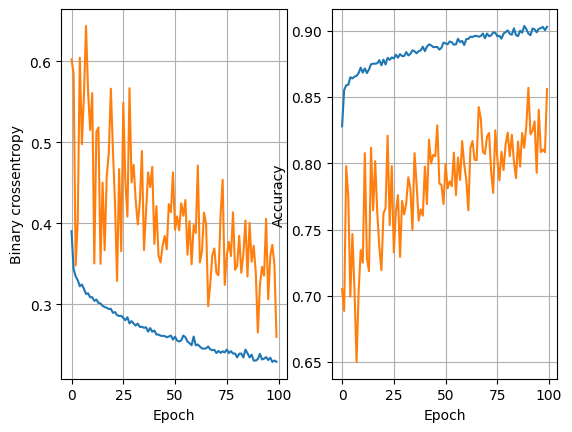

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3977
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3977
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 32
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 32
Epoch 1/100
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8266 - loss: 0.3957 - val_accuracy: 0.7844 - val_loss: 0.4308
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8266 - loss: 0.3957 - val_accuracy: 0.7844 - val_loss: 0.4308
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3418 - val_accuracy: 0.7257 - val_loss: 0.5125
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3418 - val_accuracy: 0.7257 - val_loss: 0.5125
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 0.3316 - val_accuracy: 0.7497 - val_loss: 0.4436
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - los

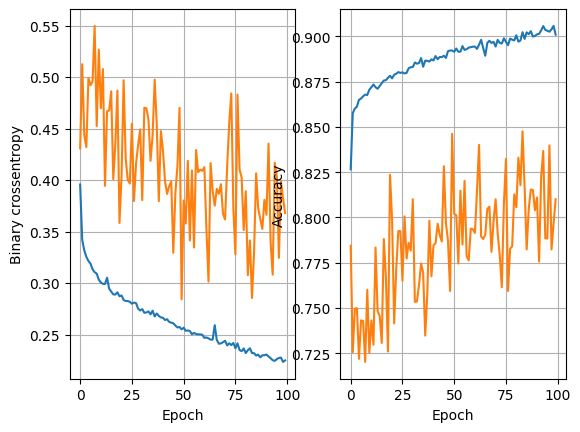

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8709 - loss: 0.3681
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8709 - loss: 0.3681
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 64
Epoch 1/100
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 64
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.3940 - val_accuracy: 0.7281 - val_loss: 0.5413
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.3940 - val_accuracy: 0.7281 - val_loss: 0.5413
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3453 - val_accuracy: 0.7277 - val_loss: 0.5455
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3453 - val_accuracy: 0.7277 - val_loss: 0.5455
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.3344 - val_accuracy: 0.7487 - val_loss: 0.4804
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - los

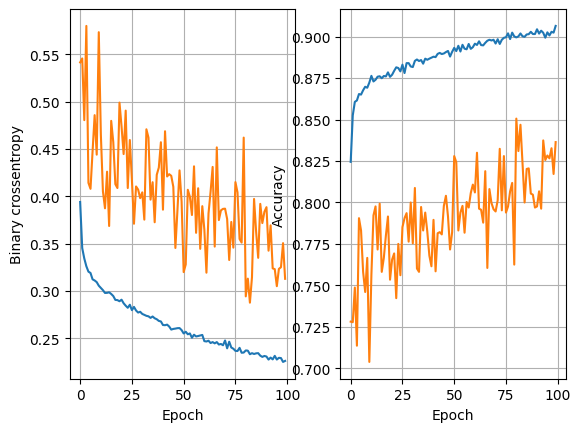

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3542
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3542
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 128
num_nodes: 16, dropout_prob: 0, lr: 0.005, batch_size: 128
Epoch 1/100
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.4056 - val_accuracy: 0.6994 - val_loss: 0.5528
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.4056 - val_accuracy: 0.6994 - val_loss: 0.5528
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3467 - val_accuracy: 0.7318 - val_loss: 0.5249
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3467 - val_accuracy: 0.7318 - val_loss: 0.5249
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.3324 - val_accuracy: 0.7277 - val_loss: 0.4806
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - l

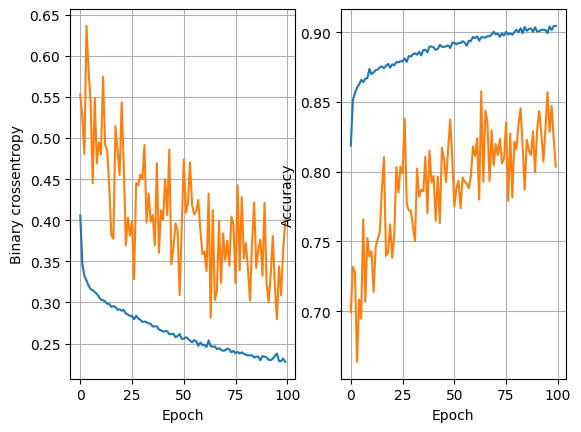

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3500
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 32
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 32
Epoch 1/100
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7792 - loss: 0.4784 - val_accuracy: 0.6397 - val_loss: 0.5909
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7792 - loss: 0.4784 - val_accuracy: 0.6397 - val_loss: 0.5909
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.3804 - val_accuracy: 0.7244 - val_loss: 0.5554
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.3804 - val_accuracy: 0.7244 - val_loss: 0.5554
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3571 - val_accuracy: 0.7581 - val_loss: 0.4848
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - los

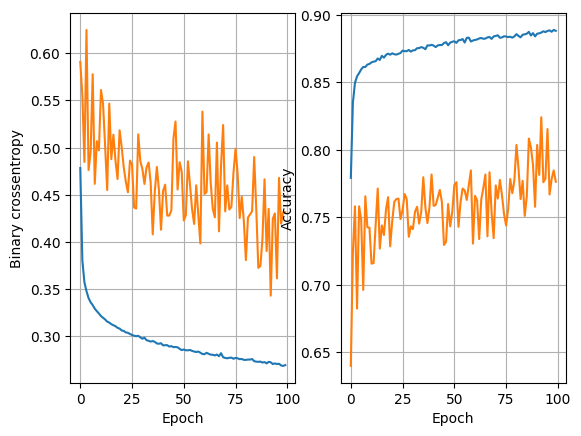

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.3113
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.3113
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 64
Epoch 1/100
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 64
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7753 - loss: 0.4744 - val_accuracy: 0.6390 - val_loss: 0.6014
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7753 - loss: 0.4744 - val_accuracy: 0.6390 - val_loss: 0.6014
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8340 - loss: 0.3810 - val_accuracy: 0.6795 - val_loss: 0.5967
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8340 - loss: 0.3810 - val_accuracy: 0.6795 - val_loss: 0.5967
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - loss: 0.3578 - val_accuracy: 0.6930 - val_loss: 0.5954
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - los

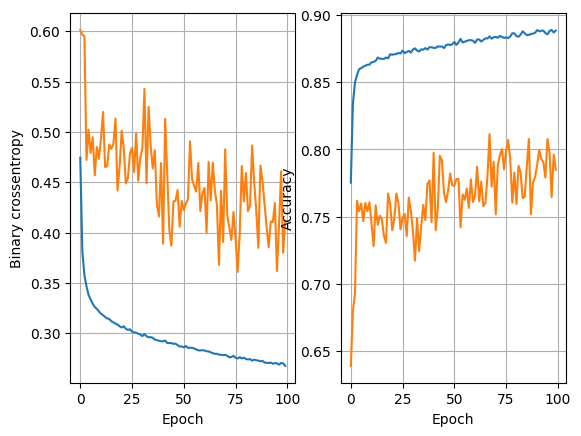

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3097
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3097
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 128
num_nodes: 16, dropout_prob: 0, lr: 0.001, batch_size: 128
Epoch 1/100
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7797 - loss: 0.4775 - val_accuracy: 0.6707 - val_loss: 0.5813
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7797 - loss: 0.4775 - val_accuracy: 0.6707 - val_loss: 0.5813
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.3859 - val_accuracy: 0.7537 - val_loss: 0.4901
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.3859 - val_accuracy: 0.7537 - val_loss: 0.4901
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.3670 - val_accuracy: 0.7304 - val_loss: 0.5320
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - l

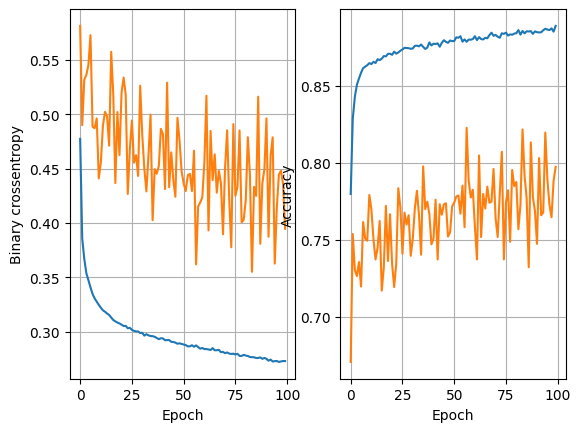

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3162
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3162
num_nodes: 16, dropout_prob: 0.2, lr: 0.01, batch_size: 32
num_nodes: 16, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Epoch 1/100
Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8088 - loss: 0.4198 - val_accuracy: 0.7223 - val_loss: 0.5144
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8088 - loss: 0.4198 - val_accuracy: 0.7223 - val_loss: 0.5144
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8418 - loss: 0.3687 - val_accuracy: 0.7638 - val_loss: 0.4384
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8418 - loss: 0.3687 - val_accuracy: 0.7638 - val_loss: 0.4384
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8489 - loss: 0.3537 - val_accuracy: 0.7075 - val_loss: 0.5857
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8489 - l

In [ ]:
train_and_evaluate(X_train, y_train, X_valid, y_valid)